# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | kondoa
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | nova sintra
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | kingscliff
Processing Record 9 of Set 1 | codrington
Processing Record 10 of Set 1 | tura
Processing Record 11 of Set 1 | bamboo flat
Processing Record 12 of Set 1 | porto novo
Processing Record 13 of Set 1 | sao fidelis
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | la passe
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | puerto deseado
Processing Record 20 of Set 1 | constantia
Processing Record 21 of Set 1 | shchastya
Processing Record 22 of Set 1

Processing Record 40 of Set 4 | seogwipo
City not found. Skipping...
Processing Record 41 of Set 4 | arraial do cabo
Processing Record 42 of Set 4 | cabo san lucas
Processing Record 43 of Set 4 | turpan
Processing Record 44 of Set 4 | malanje
Processing Record 45 of Set 4 | thinadhoo
Processing Record 46 of Set 4 | namibe
Processing Record 47 of Set 4 | changyon
Processing Record 48 of Set 4 | mugia
Processing Record 49 of Set 4 | aykhal
Processing Record 0 of Set 5 | iskateley
Processing Record 1 of Set 5 | wangdue phodrang
Processing Record 2 of Set 5 | charleston
Processing Record 3 of Set 5 | luang namtha
Processing Record 4 of Set 5 | bamyan
Processing Record 5 of Set 5 | segezha
Processing Record 6 of Set 5 | broken hill
Processing Record 7 of Set 5 | avarua
Processing Record 8 of Set 5 | portland
Processing Record 9 of Set 5 | punta arenas
Processing Record 10 of Set 5 | tarawa
Processing Record 11 of Set 5 | guanica
Processing Record 12 of Set 5 | sukhobezvodnoye
Processing Rec

Processing Record 32 of Set 8 | hammerfest
Processing Record 33 of Set 8 | oriximina
Processing Record 34 of Set 8 | coxim
Processing Record 35 of Set 8 | jonesboro
Processing Record 36 of Set 8 | petrovskaya
Processing Record 37 of Set 8 | imbituba
Processing Record 38 of Set 8 | kapuskasing
Processing Record 39 of Set 8 | parral
Processing Record 40 of Set 8 | makamba
Processing Record 41 of Set 8 | vinogradovo
Processing Record 42 of Set 8 | happy valley-goose bay
Processing Record 43 of Set 8 | kruisfontein
Processing Record 44 of Set 8 | toga village
City not found. Skipping...
Processing Record 45 of Set 8 | ulladulla
Processing Record 46 of Set 8 | puerto colombia
Processing Record 47 of Set 8 | arteche
Processing Record 48 of Set 8 | san sebastian de la gomera
Processing Record 49 of Set 8 | bengkulu
Processing Record 0 of Set 9 | vadso
Processing Record 1 of Set 9 | wake forest
Processing Record 2 of Set 9 | remire-montjoly
Processing Record 3 of Set 9 | guapore
Processing Rec

Processing Record 18 of Set 12 | santiago de cao
Processing Record 19 of Set 12 | longyearbyen
Processing Record 20 of Set 12 | bhadrachalam
Processing Record 21 of Set 12 | hihifo
City not found. Skipping...
Processing Record 22 of Set 12 | lamar
Processing Record 23 of Set 12 | zorgo
Processing Record 24 of Set 12 | gobabis
Processing Record 25 of Set 12 | skeldon
Processing Record 26 of Set 12 | siwa oasis
Processing Record 27 of Set 12 | al qadarif
Processing Record 28 of Set 12 | al bayda'
Processing Record 29 of Set 12 | newman
Processing Record 30 of Set 12 | wodonga
Processing Record 31 of Set 12 | at-bashi
Processing Record 32 of Set 12 | attapeu
Processing Record 33 of Set 12 | agapovka
Processing Record 34 of Set 12 | n'zeto
Processing Record 35 of Set 12 | adam
Processing Record 36 of Set 12 | tobi village
City not found. Skipping...
Processing Record 37 of Set 12 | essaouira
Processing Record 38 of Set 12 | stuarts draft
Processing Record 39 of Set 12 | sisimiut
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,10.76,85,98,2.24,RU,1713816165
1,port-aux-francais,-49.3500,70.2167,42.96,78,98,24.79,TF,1713816165
2,kondoa,-4.9000,35.7833,63.82,96,100,3.38,TZ,1713816165
3,adamstown,-25.0660,-130.1015,72.57,76,74,25.75,PN,1713816165
4,albany,42.6001,-73.9662,50.14,32,0,8.84,US,1713816165


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,10.76,85,98,2.24,RU,1713816165
1,port-aux-francais,-49.3500,70.2167,42.96,78,98,24.79,TF,1713816165
2,kondoa,-4.9000,35.7833,63.82,96,100,3.38,TZ,1713816165
3,adamstown,-25.0660,-130.1015,72.57,76,74,25.75,PN,1713816165
4,albany,42.6001,-73.9662,50.14,32,0,8.84,US,1713816165


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

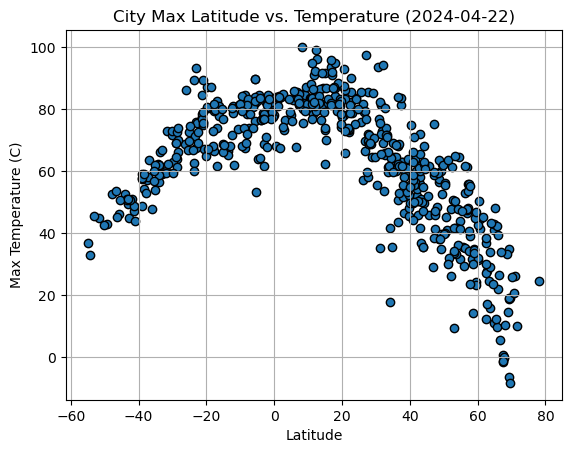

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-04-22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

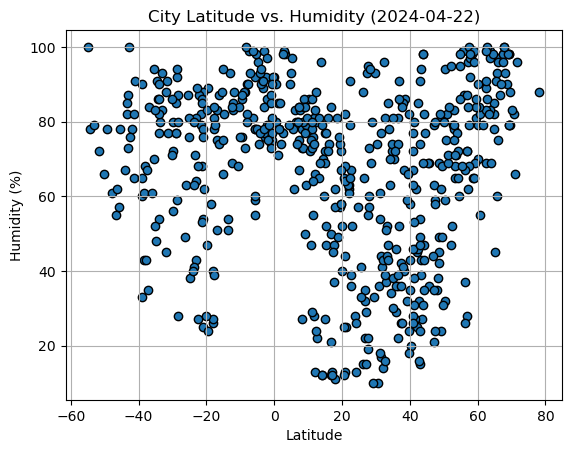

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-04-22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

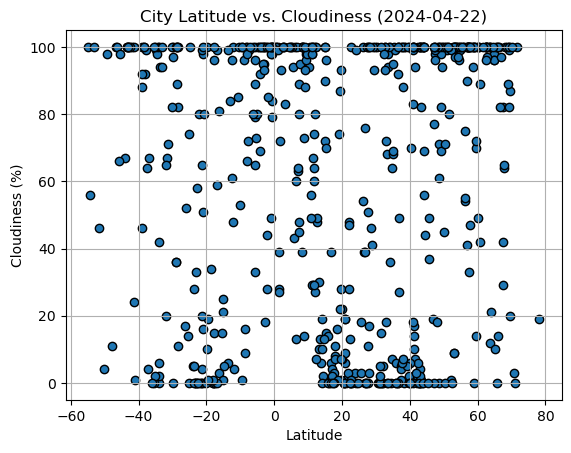

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-04-22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

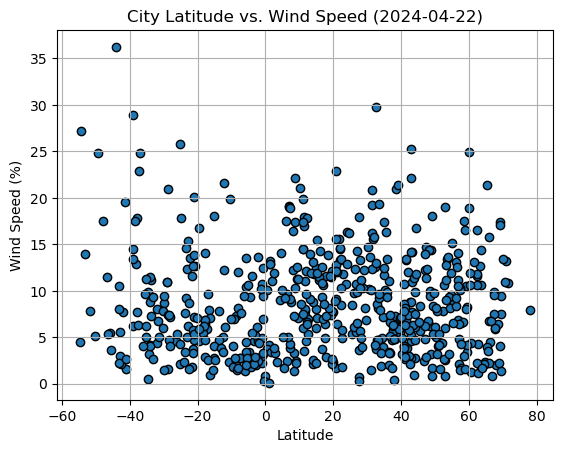

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-04-22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Label plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,10.76,85,98,2.24,RU,1713816165
4,albany,42.6001,-73.9662,50.14,32,0,8.84,US,1713816165
5,nova sintra,14.8667,-24.7167,73.26,72,72,12.17,CV,1713816166
9,tura,25.5198,90.2201,75.78,41,18,5.37,IN,1713816166
10,bamboo flat,11.7000,92.7167,80.96,81,60,7.81,IN,1713816167


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,42.96,78,98,24.79,TF,1713816165
2,kondoa,-4.9000,35.7833,63.82,96,100,3.38,TZ,1713816165
3,adamstown,-25.0660,-130.1015,72.57,76,74,25.75,PN,1713816165
6,grytviken,-54.2811,-36.5092,32.74,78,56,27.20,GS,1713816166
7,kingscliff,-28.2667,153.5667,66.04,87,82,7.23,AU,1713816166


###  Temperature vs. Latitude Linear Regression Plot

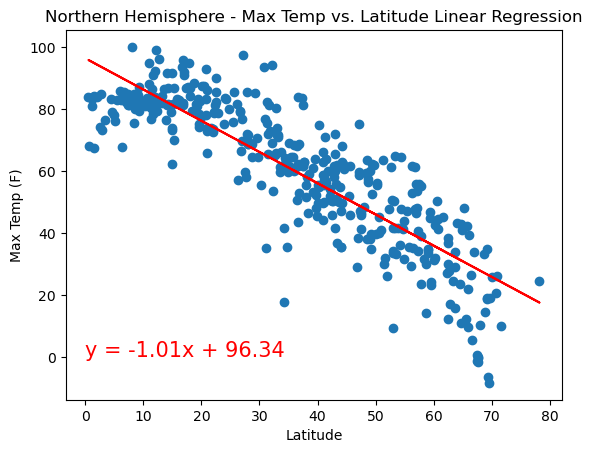

In [18]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Northern Hemisphere - Max Temp vs. Latitude Linear Regression",
                       "Latitude", "Max Temp (F)", (0, 0))

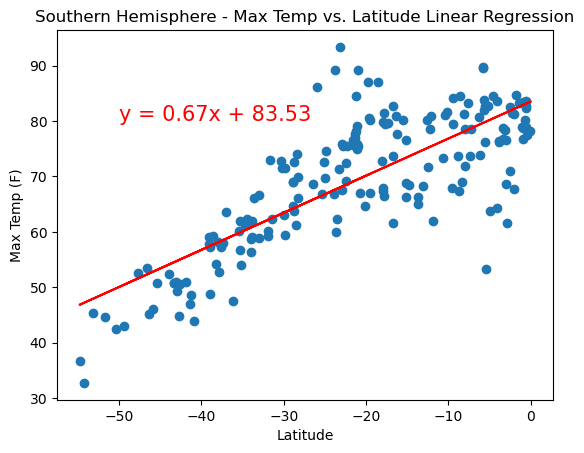

In [19]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Southern Hemisphere - Max Temp vs. Latitude Linear Regression",
                       "Latitude", "Max Temp (F)", (-50, 80))


**Discussion about the linear relationship:** Linear regression within the Northern Hemisphere is trending downward while the Southern Hemisphere is positive. Both have very similar R-Squared values.

### Humidity vs. Latitude Linear Regression Plot

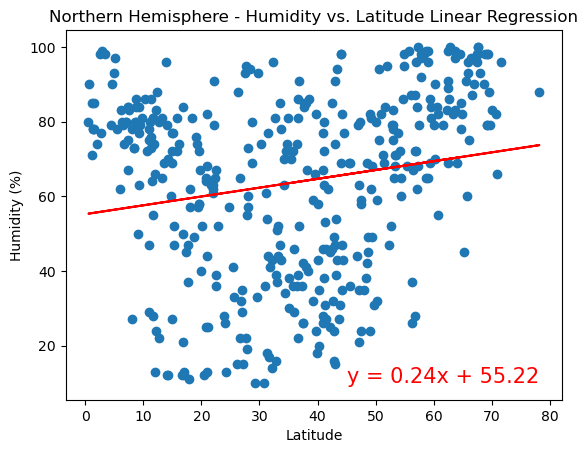

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Northern Hemisphere - Humidity vs. Latitude Linear Regression",
                       "Latitude", "Humidity (%)", (45, 10))

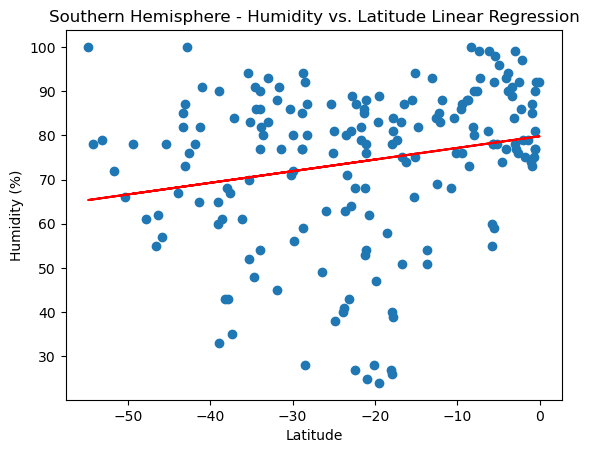

In [21]:
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Southern Hemisphere - Humidity vs. Latitude Linear Regression",
                       "Latitude", "Humidity (%)", (-50, 20))

**Discussion about the linear relationship:** Both plots are VERY similar with positive trends but barely. Both R-Squared values are VERY small, closer to 0 than 1 meaning the model only barely fits the data, the data is all over the place for both.

### Cloudiness vs. Latitude Linear Regression Plot

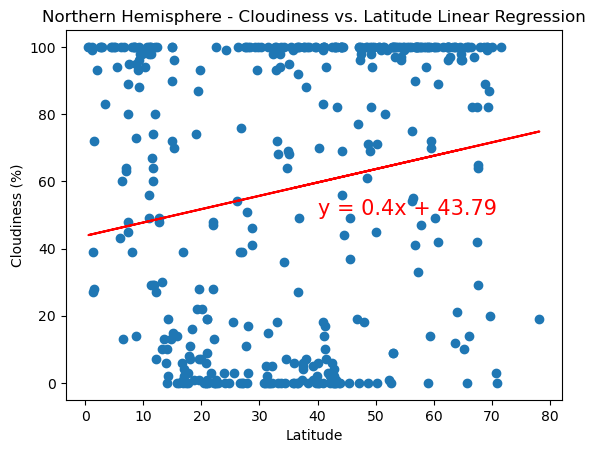

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression",
                       "Latitude", "Cloudiness (%)", (40, 50))

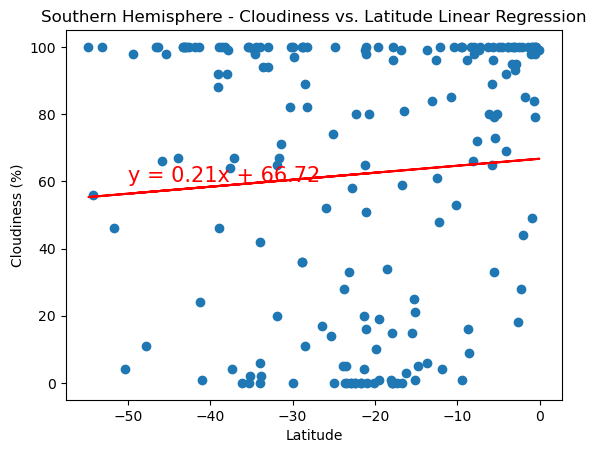

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression",
                       "Latitude", "Cloudiness (%)", (-50, 60))

**Discussion about the linear relationship:** Both plots are VERY similar with positive trends but barely. Both R-Squared values are VERY small, closer to 0 than 1 meaning the model only barely fits the data, the data is all over the place for both.

### Wind Speed vs. Latitude Linear Regression Plot

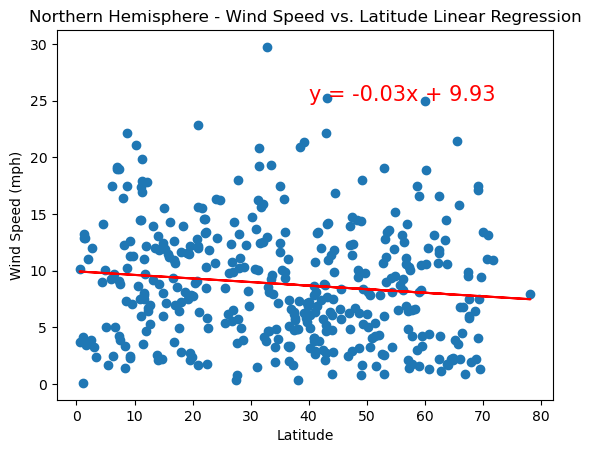

In [24]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression",
                       "Latitude", "Wind Speed (mph)", (40, 25))


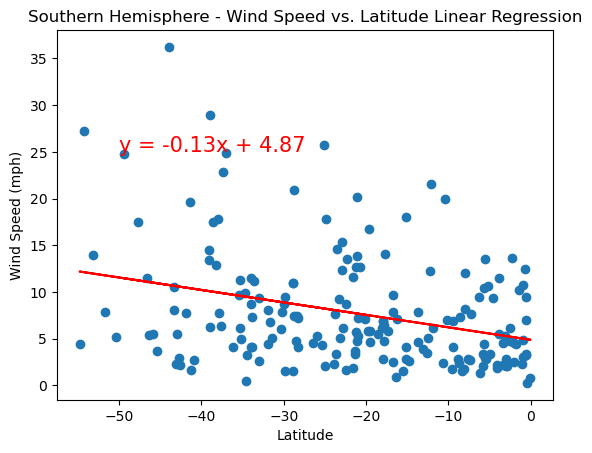

In [25]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression",
                       "Latitude", "Wind Speed (mph)", (-50, 25))

**Discussion about the linear relationship:** Both plots are VERY similar with negative trends but barely. Both R-Squared values are VERY small, closer to 0 than 1 meaning the model only barely fits the data, the data is all over the place for both.